In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [4]:
pwd

'C:\\Users\\user\\anaconda3'

In [26]:
df = pd.read_csv('train_datta (1).csv', index_col='Customer Id')

In [27]:
df.head(n=10)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
Customer Id,,,,,,,,,,,,,
H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0
H4977,2012,1.0,0,V,N,O,R,535.0,1,1980.0,3,1143,0
H7390,2012,1.0,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
H14488,2015,1.0,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
H19355,2014,1.0,0,V,N,O,R,2735.0,1,2013.0,3,1173,1


In [28]:
df.shape

(7160, 13)

In [29]:
df.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [30]:
df['Garden'].isnull().value_counts()/len(df)

False    0.999022
True     0.000978
Name: Garden, dtype: float64

In [31]:
df['Building Dimension'].isnull().value_counts()/len(df)

False    0.985196
True     0.014804
Name: Building Dimension, dtype: float64

In [32]:
df['Geo_Code'].isnull().value_counts()/len(df)

False    0.985754
True     0.014246
Name: Geo_Code, dtype: float64

In [33]:
df.Garden.value_counts()/len(df)

O    0.503073
V    0.495950
Name: Garden, dtype: float64

In [34]:
df['Garden'].mode()

0    O
dtype: object

In [37]:
df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)

In [41]:
df['Building Dimension'].mode()

0    400.0
dtype: float64

In [43]:
df['Garden'].fillna(df['Garden'].mode()[0], inplace=True)

In [44]:
df['Geo_Code'].mode()

0    6088
dtype: object

In [45]:
df['Building Dimension'].fillna(df['Building Dimension'].mode()[0], inplace=True)

In [46]:
df['Geo_Code'].fillna(df['Geo_Code'].mode()[0], inplace=True)

In [47]:
df.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code                0
Claim                   0
dtype: int64

In [48]:
df['Date_of_Occupancy'].median()

1970.0

In [50]:
df['Date_of_Occupancy'].fillna(df['Date_of_Occupancy'].median(), inplace=True)

In [51]:
df.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [66]:
train = pd.read_csv('train_datta (1).csv')

In [69]:
train_copy = train.copy()

<AxesSubplot:xlabel='Date_of_Occupancy', ylabel='count'>

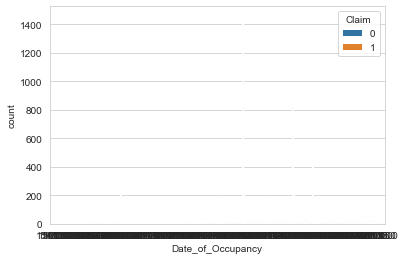

In [71]:
sns.countplot(x='Date_of_Occupancy', data=train_copy, hue='Claim')

In [72]:
train = train.drop('Customer Id', axis=1)

In [73]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [74]:
X = train.drop('Claim', axis=1)
y = train.Claim

In [76]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [88]:
df.drop(columns='NumberOfWindows', inplace=True)

In [92]:
df.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Geo_Code,Claim
Customer Id,,,,,,,,,,,,
H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,1053,0
H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,1053,0
H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,1053,0
H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,1053,0
H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,1053,0
